# Digital Wallet Analysis

* Data is taken from kaggle.com

In [1]:
# import dependancies

import pandas as pd

### My analysis start here

In [2]:
df = pd.read_csv('digital_wallet_transactions.csv')

In [3]:
df.head()

,idx,transaction_id,user_id,transaction_date,product_category,product_name,merchant_name,product_amount,transaction_fee,cashback,loyalty_points,payment_method,transaction_status,merchant_id,device_type,location
0,1,4dac3ea3-6492-46ec-80b8-dc45c3ad0b14,USER_05159,2023-08-19 03:32,Rent Payment,2BHK Flat Deposit,Airbnb,1525.39,36.69,19.19,186,Debit Card,Successful,MERCH_0083,iOS,Urban
1,2,a903ed9f-eb84-47e7-b8aa-fd1786c919cf,USER_07204,2023-08-19 04:37,Gas Bill,Commercial Gas Connection,Adani Gas,1495.40,28.19,89.99,182,UPI,Successful,MERCH_0163,iOS,Urban
2,3,2a393013-733c-4add-9f09-bed1eeb33676,USER_00903,2023-08-19 05:52,Bus Ticket,Semi-Sleeper,MakeMyTrip Bus,1267.71,11.36,95.70,994,UPI,Successful,MERCH_0320,iOS,Urban
3,4,9a07ad19-4673-4794-9cd2-9b139f39c715,USER_01769,2023-08-19 06:35,Internet Bill,4G Unlimited Plan,Airtel Broadband,9202.63,6.41,82.24,409,Debit Card,Successful,MERCH_0194,Android,Urban
4,5,76418260-c985-4011-979d-0914604d0d68,USER_03544,2023-08-19 06:36,Loan Repayment,Home Loan EMI,Axis Bank,3100.58,41.15,40.47,837,Debit Card,Successful,MERCH_0504,Android,Urban


- Explore dataset

In [4]:
df.dtypes

idx                     int64
transaction_id         object
user_id                object
transaction_date       object
product_category       object
product_name           object
merchant_name          object
product_amount        float64
transaction_fee       float64
cashback              float64
loyalty_points          int64
payment_method         object
transaction_status     object
merchant_id            object
device_type            object
location               object
dtype: object

In [5]:
df.isnull().sum()

idx                   0
transaction_id        0
user_id               0
transaction_date      0
product_category      0
product_name          0
merchant_name         0
product_amount        0
transaction_fee       0
cashback              0
loyalty_points        0
payment_method        0
transaction_status    0
merchant_id           0
device_type           0
location              0
dtype: int64

In [7]:
df.describe()

,idx,product_amount,transaction_fee,cashback,loyalty_points
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,4957.502722,25.188874,50.658782,498.790400
std,1443.520003,2885.034160,14.535298,28.522467,288.962434
min,1.000000,10.090000,0.010000,0.000000,0.000000
25%,1250.750000,2453.977500,12.665000,26.495000,246.000000
50%,2500.500000,4943.685000,25.070000,51.390000,504.000000
75%,3750.250000,7444.815000,37.947500,75.067500,749.000000
max,5000.000000,9996.950000,49.990000,100.000000,999.000000


In [4]:
df['transaction_date']= pd.to_datetime(df['transaction_date'])


# '07-AUG-2024' - Date

# '07-AUG-2024 23:00:00' - Datetime

In [17]:
df.dtypes[['transaction_date']]


print(type(df.iloc[1,3]))


<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [16]:
df.iloc[1,3]

Timestamp('2023-08-19 04:37:00')

In [18]:
df.head()



,idx,transaction_id,user_id,transaction_date,product_category,product_name,merchant_name,product_amount,transaction_fee,cashback,loyalty_points,payment_method,transaction_status,merchant_id,device_type,location
0,1,4dac3ea3-6492-46ec-80b8-dc45c3ad0b14,USER_05159,2023-08-19 03:32:00,Rent Payment,2BHK Flat Deposit,Airbnb,1525.39,36.69,19.19,186,Debit Card,Successful,MERCH_0083,iOS,Urban
1,2,a903ed9f-eb84-47e7-b8aa-fd1786c919cf,USER_07204,2023-08-19 04:37:00,Gas Bill,Commercial Gas Connection,Adani Gas,1495.40,28.19,89.99,182,UPI,Successful,MERCH_0163,iOS,Urban
2,3,2a393013-733c-4add-9f09-bed1eeb33676,USER_00903,2023-08-19 05:52:00,Bus Ticket,Semi-Sleeper,MakeMyTrip Bus,1267.71,11.36,95.70,994,UPI,Successful,MERCH_0320,iOS,Urban
3,4,9a07ad19-4673-4794-9cd2-9b139f39c715,USER_01769,2023-08-19 06:35:00,Internet Bill,4G Unlimited Plan,Airtel Broadband,9202.63,6.41,82.24,409,Debit Card,Successful,MERCH_0194,Android,Urban
4,5,76418260-c985-4011-979d-0914604d0d68,USER_03544,2023-08-19 06:36:00,Loan Repayment,Home Loan EMI,Axis Bank,3100.58,41.15,40.47,837,Debit Card,Successful,MERCH_0504,Android,Urban


- Analyse data

In [22]:
df.loc[df['product_category'].str.contains('^Loan', na=False)]

,idx,transaction_id,user_id,transaction_date,product_category,product_name,merchant_name,product_amount,transaction_fee,cashback,loyalty_points,payment_method,transaction_status,merchant_id,device_type,location
4,5,76418260-c985-4011-979d-0914604d0d68,USER_03544,2023-08-19 06:36:00,Loan Repayment,Home Loan EMI,Axis Bank,3100.58,41.15,40.47,837,Debit Card,Successful,MERCH_0504,Android,Urban
27,28,37bf717f-c8f9-46c9-baf5-0d66ac683bab,USER_04900,2023-08-20 06:47:00,Loan Repayment,Car Loan Installment,Axis Bank,6916.55,37.41,50.01,616,UPI,Successful,MERCH_0009,Android,Suburban
40,41,bd51839f-7dd2-4d26-91e2-4504b79c1dde,USER_03336,2023-08-20 22:06:00,Loan Repayment,Business Loan Repayment,ICICI Bank,2578.28,35.06,59.04,78,Bank Transfer,Successful,MERCH_0073,Android,Urban
48,49,569dcf7a-9e65-4271-9484-7acdc0f1118b,USER_07984,2023-08-21 05:28:00,Loan Repayment,Education Loan EMI,HDFC Bank,1044.85,3.60,95.47,769,Debit Card,Successful,MERCH_0797,Android,Urban
55,56,20ca6543-cc63-4d1d-bab5-5cbcdf2f7bc4,USER_01404,2023-08-21 19:32:00,Loan Repayment,Home Loan EMI,ICICI Bank,9828.97,21.55,50.04,414,UPI,Successful,MERCH_0390,Android,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4930,4931,8b416537-0ac2-464d-bc05-e756ab3b3f8c,USER_02626,2024-08-14 00:39:00,Loan Repayment,Car Loan Installment,SBI,6244.20,42.84,67.31,447,Credit Card,Successful,MERCH_0864,iOS,Suburban
4932,4933,e64623b9-c9e1-409a-9152-7349b216ef6e,USER_06252,2024-08-14 02:18:00,Loan Repayment,Car Loan Installment,Bajaj Finserv,5896.67,43.26,55.37,952,Debit Card,Successful,MERCH_0137,Android,Urban
4945,4946,046e6ee4-5d6c-4abf-a2f8-a16fd084af69,USER_04505,2024-08-15 00:48:00,Loan Repayment,Business Loan Repayment,SBI,9145.95,34.02,90.73,491,Credit Card,Successful,MERCH_0290,iOS,Urban
4975,4976,02ac355d-12be-4158-ba06-4ec560830b57,USER_04810,2024-08-16 17:58:00,Loan Repayment,Education Loan EMI,HDFC Bank,7903.33,20.93,13.17,383,Credit Card,Successful,MERCH_0373,Android,Suburban


In [29]:
df.groupby(['product_category','product_name']).count()['transaction_id'].sort_values(ascending=False).to_frame()

transaction_id
product_category  product_name                             
Education Fee     Python Programming Course              80
Streaming Service Basic Plan                             74
                  Standard Plan                          66
Movie Ticket      3 Idiots                               64
Water Bill        Commercial Property                    63
...                                                     ...
Flight Booking    Bangalore to Kolkata                   40
Gaming Credits    Premium Skin                           38
Grocery Shopping  Mixed Fruit Jam                        37
Taxi Fare         Outstation Trip                        37
Gift Card         Rs. 1000 Shopping Voucher              36

[100 rows x 1 columns]

In [30]:
df.head()

,idx,transaction_id,user_id,transaction_date,product_category,product_name,merchant_name,product_amount,transaction_fee,cashback,loyalty_points,payment_method,transaction_status,merchant_id,device_type,location
0,1,4dac3ea3-6492-46ec-80b8-dc45c3ad0b14,USER_05159,2023-08-19 03:32:00,Rent Payment,2BHK Flat Deposit,Airbnb,1525.39,36.69,19.19,186,Debit Card,Successful,MERCH_0083,iOS,Urban
1,2,a903ed9f-eb84-47e7-b8aa-fd1786c919cf,USER_07204,2023-08-19 04:37:00,Gas Bill,Commercial Gas Connection,Adani Gas,1495.40,28.19,89.99,182,UPI,Successful,MERCH_0163,iOS,Urban
2,3,2a393013-733c-4add-9f09-bed1eeb33676,USER_00903,2023-08-19 05:52:00,Bus Ticket,Semi-Sleeper,MakeMyTrip Bus,1267.71,11.36,95.70,994,UPI,Successful,MERCH_0320,iOS,Urban
3,4,9a07ad19-4673-4794-9cd2-9b139f39c715,USER_01769,2023-08-19 06:35:00,Internet Bill,4G Unlimited Plan,Airtel Broadband,9202.63,6.41,82.24,409,Debit Card,Successful,MERCH_0194,Android,Urban
4,5,76418260-c985-4011-979d-0914604d0d68,USER_03544,2023-08-19 06:36:00,Loan Repayment,Home Loan EMI,Axis Bank,3100.58,41.15,40.47,837,Debit Card,Successful,MERCH_0504,Android,Urban


In [33]:
df.groupby('merchant_name').sum()['cashback'].sort_values(ascending=False)

merchant_name
Flipkart      5326.77
Airbnb        5154.49
MakeMyTrip    4342.09
Netflix       3950.42
CESC          3474.81
               ...   
Cleartrip     1891.22
Vodafone      1857.33
Amazon Pay    1842.84
RedBus        1779.08
EaseMyTrip    1672.72
Name: cashback, Length: 97, dtype: float64

In [34]:
df['cashback_ratio'] = df['product_amount']/df['cashback']


df.head()

,idx,transaction_id,user_id,transaction_date,product_category,product_name,merchant_name,product_amount,transaction_fee,cashback,loyalty_points,payment_method,transaction_status,merchant_id,device_type,location,cashback_ratio
0,1,4dac3ea3-6492-46ec-80b8-dc45c3ad0b14,USER_05159,2023-08-19 03:32:00,Rent Payment,2BHK Flat Deposit,Airbnb,1525.39,36.69,19.19,186,Debit Card,Successful,MERCH_0083,iOS,Urban,79.488796
1,2,a903ed9f-eb84-47e7-b8aa-fd1786c919cf,USER_07204,2023-08-19 04:37:00,Gas Bill,Commercial Gas Connection,Adani Gas,1495.40,28.19,89.99,182,UPI,Successful,MERCH_0163,iOS,Urban,16.617402
2,3,2a393013-733c-4add-9f09-bed1eeb33676,USER_00903,2023-08-19 05:52:00,Bus Ticket,Semi-Sleeper,MakeMyTrip Bus,1267.71,11.36,95.70,994,UPI,Successful,MERCH_0320,iOS,Urban,13.246708
3,4,9a07ad19-4673-4794-9cd2-9b139f39c715,USER_01769,2023-08-19 06:35:00,Internet Bill,4G Unlimited Plan,Airtel Broadband,9202.63,6.41,82.24,409,Debit Card,Successful,MERCH_0194,Android,Urban,111.899684
4,5,76418260-c985-4011-979d-0914604d0d68,USER_03544,2023-08-19 06:36:00,Loan Repayment,Home Loan EMI,Axis Bank,3100.58,41.15,40.47,837,Debit Card,Successful,MERCH_0504,Android,Urban,76.614282


In [36]:
df.groupby('merchant_name').max()['cashback_ratio'].sort_values(ascending=False)

merchant_name
Cinepolis                   inf
Idea               8.502038e+04
Amazon Prime       8.217978e+04
Delhi Jal Board    6.798886e+04
Uber               6.135483e+04
                       ...     
BigBasket          6.422159e+02
Amazon Pantry      6.335629e+02
Snapdeal           6.198749e+02
Zomato             4.416213e+02
Ixigo              4.414961e+02
Name: cashback_ratio, Length: 97, dtype: float64

In [37]:
df.groupby('product_category').max()['cashback_ratio'].sort_values(ascending=False)

product_category
Movie Ticket                  inf
Mobile Recharge      8.502038e+04
Streaming Service    8.217978e+04
Water Bill           6.798886e+04
Taxi Fare            6.135483e+04
Rent Payment         5.453858e+04
Hotel Booking        3.208695e+04
Education Fee        1.799076e+04
Gift Card            1.777960e+04
Gas Bill             1.484529e+04
Food Delivery        1.380363e+04
Gaming Credits       1.283733e+04
Electricity Bill     1.015194e+04
Grocery Shopping     7.332896e+03
Insurance Premium    7.239452e+03
Internet Bill        6.898679e+03
Bus Ticket           6.543240e+03
Flight Booking       6.496215e+03
Loan Repayment       4.374565e+03
Online Shopping      3.447883e+03
Name: cashback_ratio, dtype: float64

In [39]:
df.loc[df['cashback'] == 0]

,idx,transaction_id,user_id,transaction_date,product_category,product_name,merchant_name,product_amount,transaction_fee,cashback,loyalty_points,payment_method,transaction_status,merchant_id,device_type,location,cashback_ratio
4950,4951,ca9b1016-8230-4b48-b594-9eaaa306bb77,USER_09387,2024-08-15 11:04:00,Movie Ticket,PK,Cinepolis,4893.87,16.84,0.0,721,Debit Card,Successful,MERCH_0971,Android,Urban,inf


In [40]:
df['transaction_status'].unique()

array(['Successful', 'Failed', 'Pending'], dtype=object)

In [41]:
df.groupby('transaction_status').count()['transaction_id'].sort_values(ascending=False)

transaction_status
Successful    4755
Failed         146
Pending         99
Name: transaction_id, dtype: int64

In [43]:
pending_df = df.loc[df['transaction_status'] == 'Pending']

In [44]:
pending_df.groupby('merchant_name').count()['transaction_id'].sort_values(ascending=False)

merchant_name
MakeMyTrip               5
ACT Fibernet             4
Airbnb                   4
HDFC Bank                4
Adani Gas                3
Flipkart                 3
Cinepolis                3
Mumbai Water             3
Axis Bank                3
Hathway                  3
Treebo                   2
SonyLIV                  2
INOX                     2
Idea                     2
Vodafone                 2
Flipkart Supermart       2
Uber Eats                2
Domino's                 2
Myntra                   2
BSES                     2
Bharat Gas               2
Amazon Pay               2
PVR Cinemas              2
Pantaloons               2
Rapido                   2
Roblox                   2
SBI                      2
Amazon Prime             1
Call of Duty Mobile      1
Amazon Pantry            1
AbhiBus                  1
Free Fire                1
Goibibo                  1
Grofers                  1
BigBasket                1
ZEE5                     1
Hotstar       

In [45]:
pending_df.groupby('payment_method').count()['transaction_id'].sort_values(ascending=False)

payment_method
Wallet Balance    24
UPI               24
Credit Card       24
Bank Transfer     18
Debit Card         9
Name: transaction_id, dtype: int64

In [46]:
df.groupby(['transaction_status', 'payment_method']).count()['transaction_id'].sort_values(ascending=False)

transaction_status  payment_method
Successful          Bank Transfer     998
                    Debit Card        988
                    UPI               950
                    Credit Card       933
                    Wallet Balance    886
Failed              Credit Card        35
                    Wallet Balance     32
                    Bank Transfer      29
                    UPI                25
                    Debit Card         25
Pending             Wallet Balance     24
                    UPI                24
                    Credit Card        24
                    Bank Transfer      18
                    Debit Card          9
Name: transaction_id, dtype: int64

In [47]:
df.head(5)

,idx,transaction_id,user_id,transaction_date,product_category,product_name,merchant_name,product_amount,transaction_fee,cashback,loyalty_points,payment_method,transaction_status,merchant_id,device_type,location,cashback_ratio
0,1,4dac3ea3-6492-46ec-80b8-dc45c3ad0b14,USER_05159,2023-08-19 03:32:00,Rent Payment,2BHK Flat Deposit,Airbnb,1525.39,36.69,19.19,186,Debit Card,Successful,MERCH_0083,iOS,Urban,79.488796
1,2,a903ed9f-eb84-47e7-b8aa-fd1786c919cf,USER_07204,2023-08-19 04:37:00,Gas Bill,Commercial Gas Connection,Adani Gas,1495.40,28.19,89.99,182,UPI,Successful,MERCH_0163,iOS,Urban,16.617402
2,3,2a393013-733c-4add-9f09-bed1eeb33676,USER_00903,2023-08-19 05:52:00,Bus Ticket,Semi-Sleeper,MakeMyTrip Bus,1267.71,11.36,95.70,994,UPI,Successful,MERCH_0320,iOS,Urban,13.246708
3,4,9a07ad19-4673-4794-9cd2-9b139f39c715,USER_01769,2023-08-19 06:35:00,Internet Bill,4G Unlimited Plan,Airtel Broadband,9202.63,6.41,82.24,409,Debit Card,Successful,MERCH_0194,Android,Urban,111.899684
4,5,76418260-c985-4011-979d-0914604d0d68,USER_03544,2023-08-19 06:36:00,Loan Repayment,Home Loan EMI,Axis Bank,3100.58,41.15,40.47,837,Debit Card,Successful,MERCH_0504,Android,Urban,76.614282


In [48]:
pending_df.groupby('location').count()['transaction_id'].sort_values(ascending=False)

location
Urban       72
Suburban    17
Rural       10
Name: transaction_id, dtype: int64

In [52]:
df.groupby(['transaction_status','location' ]).count()['transaction_id'].sort_values(ascending=False)

transaction_status  location
Successful          Urban       3309
                    Suburban     972
                    Rural        474
Failed              Urban        104
Pending             Urban         72
Failed              Suburban      28
Pending             Suburban      17
Failed              Rural         14
Pending             Rural         10
Name: transaction_id, dtype: int64

In [53]:
df.head()

,idx,transaction_id,user_id,transaction_date,product_category,product_name,merchant_name,product_amount,transaction_fee,cashback,loyalty_points,payment_method,transaction_status,merchant_id,device_type,location,cashback_ratio
0,1,4dac3ea3-6492-46ec-80b8-dc45c3ad0b14,USER_05159,2023-08-19 03:32:00,Rent Payment,2BHK Flat Deposit,Airbnb,1525.39,36.69,19.19,186,Debit Card,Successful,MERCH_0083,iOS,Urban,79.488796
1,2,a903ed9f-eb84-47e7-b8aa-fd1786c919cf,USER_07204,2023-08-19 04:37:00,Gas Bill,Commercial Gas Connection,Adani Gas,1495.40,28.19,89.99,182,UPI,Successful,MERCH_0163,iOS,Urban,16.617402
2,3,2a393013-733c-4add-9f09-bed1eeb33676,USER_00903,2023-08-19 05:52:00,Bus Ticket,Semi-Sleeper,MakeMyTrip Bus,1267.71,11.36,95.70,994,UPI,Successful,MERCH_0320,iOS,Urban,13.246708
3,4,9a07ad19-4673-4794-9cd2-9b139f39c715,USER_01769,2023-08-19 06:35:00,Internet Bill,4G Unlimited Plan,Airtel Broadband,9202.63,6.41,82.24,409,Debit Card,Successful,MERCH_0194,Android,Urban,111.899684
4,5,76418260-c985-4011-979d-0914604d0d68,USER_03544,2023-08-19 06:36:00,Loan Repayment,Home Loan EMI,Axis Bank,3100.58,41.15,40.47,837,Debit Card,Successful,MERCH_0504,Android,Urban,76.614282


In [68]:
df_sum = df.groupby('transaction_status').count()['transaction_id'].to_frame().reset_index()

df_sum.head()

,transaction_status,transaction_id
0,Failed,146
1,Pending,99
2,Successful,4755


In [80]:
failed_transactions = df_sum.iloc[0, 1]

In [81]:
total_transactions  = df['transaction_id'].count()

In [83]:
pending_transactions = df_sum.iloc[1, 1]
print(pending_transactions)

99


In [85]:
successful_transactions = df_sum.iloc[2, 1]
print(successful_transactions)

4755


In [88]:
success_ratio = successful_transactions / total_transactions

fail_ration = failed_transactions / total_transactions


pending_ration = pending_transactions / total_transactions


print(f'success rate is {success_ratio*100},\
      fail ratio is {fail_ration*100},\
        and pending ratio is {pending_ration*100}')

success rate is 95.1,      fail ratio is 2.92,        and pending ratio is 1.9800000000000002


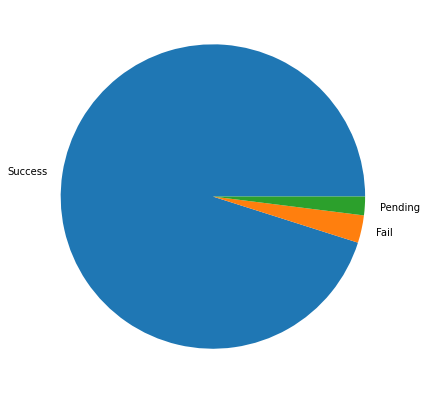

In [90]:
from matplotlib import pyplot as plt
import numpy as np


# Creating dataset
data = [success_ratio*100, fail_ration*100, pending_ration*100]

categories = ['Success', 'Fail', 'Pending']

# Creating plot
fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=categories)

# show plot
plt.show()